Setupp and import libraries for Qiskit-based quantum circuit development

In [ ]:
#install and importing librarys

!pip install qiskit
!pip install pylatexenc

#from qiskit import IBMQ , Aer, execute
#from qiskit.circuit import QuantumCircuit, Parameter
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicProvider

from qiskit import *
from qiskit.circuit import (
    AnnotatedOperation,
    ControlModifier,
    PowerModifier,
    InverseModifier,
    QuantumCircuit
)
from qiskit.circuit.library import SGate
from qiskit.circuit import Parameter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=a691b774c0c4f3e163c4f9ba0de9ccd60fcc9b2e12dc6490d8fbfb119d84c230
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


Import Qiskit fake backend and histogram visualization tools

In [ ]:
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_histogram
backend = GenericBackendV2(num_qubits=3)

Create a 3-qubit quantum register and 3-bit classical register

In [ ]:
# Creating registers
qr = QuantumRegister(3, name="qr")
cr = ClassicalRegister(3, name="cr")

Define a custom controlled rotation gate (F_gate)that adjusts qubit amplitudes based on control qubits. Reverse CNOT (cxrv) gate that swaps the control and target via Hadamard gates, enabling flexible qubit interactions

In [ ]:
import numpy as np

# Here, two useful routine
#Define a F_gate
def F_gate(circ,q,i,j,n,k) :
    theta = np.arccos(np.sqrt(1/(n-k+1)))
    circ.ry(-theta,q[j])
    circ.cz(q[i],q[j])
    circ.ry(theta,q[j])
    circ.barrier(q[i])
# Define the cxrv gate which uses reverse CNOT instead of CNOT
def  cxrv(circ,q,i,j) :
    circ.h(q[i])
    circ.h(q[j])
    circ.cx(q[j],q[i])
    circ.h(q[i])
    circ.h(q[j])
    circ.barrier(q[i],q[j])

Creates a 3-qubit quantum circuit applying custom F_gate rotations and CNOT/cxrv gates, with optional backend-specific configurations, and visualizes the transpiled circuit

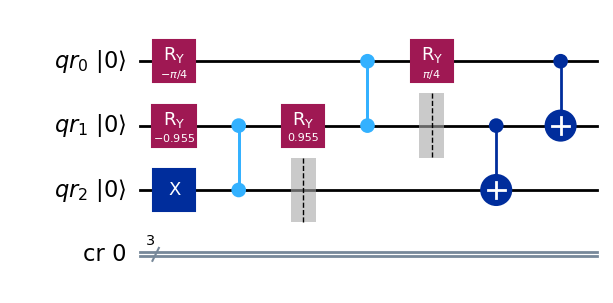

In [ ]:
# Define the flag_qx2 variable
flag_qx2 = True  # Set it to True or False based on your requirements
singlet = QuantumCircuit(qr, cr)

singlet.x(qr[2])  # start is |100>
F_gate(singlet, qr, 2, 1, 3, 1)  # Applying F12
F_gate(singlet, qr, 1, 0, 3, 2)  # Applying F23

if flag_qx2:  # option ibmqx2
    singlet.cx(qr[1], qr[2])  # cNOT 21
    singlet.cx(qr[0], qr[1])  # cNOT 32
else:  # option ibmqx4
    cxrv(singlet, qr, 1, 2)
    cxrv(singlet, qr, 0, 1)

# Draw circuit
singlet.draw(output='mpl', initial_state=True)

# Transpile the ideal circuit to a circuit that can be directly executed by the backend
#transpiled_circuit = transpile(singlet, backend)
#transpiled_circuit.draw('mpl')

Alice Measurement

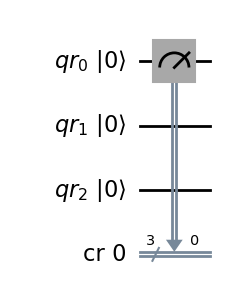

In [ ]:
# measure the spin projection of Alice's qubit onto the a_3 direction (standard Z basis)
#create circuit
measureA1 = QuantumCircuit(qr, cr, name='measureA1')

#apply measurement
measureA1.measure(qr[0],cr[0])
#measureEA1.measure(qr[0],cr[3])

#draw circuit
measureA1.draw(output = 'mpl' , initial_state = True)
#measureEA1.draw(output = 'mpl' , initial_state = True)

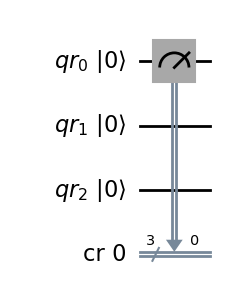

In [ ]:
#create a circuit
measureA2 = QuantumCircuit(qr, cr, name='measureA2')

#apply hadamard
#measureA2.h(qr[0])

#apply measurement
measureA2.measure(qr[0],cr[0])
#measureEA2.measure(qr[0],cr[3])

#draw circuit
measureA2.draw(output = 'mpl' , initial_state = True)
#measureEA2.draw(output = 'mpl' , initial_state = True)

Bob's Measurement

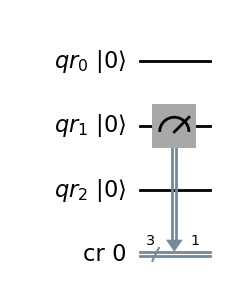

In [ ]:
#build circuit
measureB1 = QuantumCircuit(qr, cr, name='measureB1')
#measureEB1 = QuantumCircuit(qr, cr, name='measureEB1')

#apply hadamard
#measureB1.h(qr[1])

#apply measurement
measureB1.measure(qr[1],cr[1])
#measureEB1.measure(qr[1],cr[3])

#draw circuit
measureB1.draw(output = 'mpl' , initial_state = True)


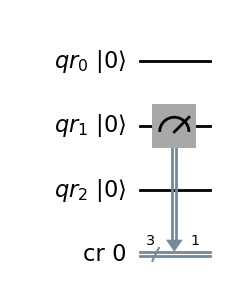

In [ ]:
#create a circuit
measureB2 = QuantumCircuit(qr, cr, name='measureB2')
#measureEB2 = QuantumCircuit(qr, cr, name='measureEB2')

#apply hadamard
#measureEB2.h(qr[1])

#apply measurement
measureB2.measure(qr[1],cr[1])
#measureEB2.measure(qr[1],cr[4])

#draw circuit
measureB2.draw(output = 'mpl' , initial_state = True)

Charlie's Measurement

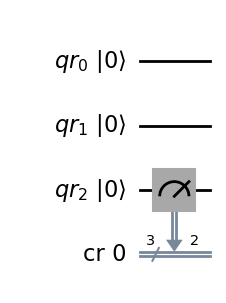

In [ ]:
#build circuit
measureC1 = QuantumCircuit(qr, cr, name='measureC1')
#measureEC1 = QuantumCircuit(qr, cr, name='measureEC1')

#apply hadamard
#measureEC1.h(qr[2])

#apply measurement
measureC1.measure(qr[2],cr[2])
#measureEC1.measure(qr[2],cr[4])

#draw circuit
measureC1.draw(output = 'mpl' , initial_state = True)
#measureEC1.draw(output = 'mpl' , initial_state = True)

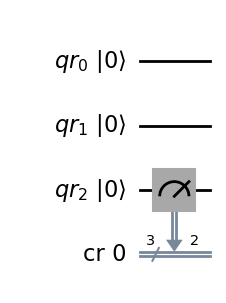

In [ ]:
#create a circuit
measureC2 = QuantumCircuit(qr, cr, name='measureC2')
#measureEC2 = QuantumCircuit(qr, cr, name='measureEC2')

#apply hadamard
#measureC2.h(qr[2])

#apply measurement
measureC2.measure(qr[2],cr[2])
#measureEC2.measure(qr[2],cr[5])

#draw circuit
measureC2.draw(output = 'mpl' , initial_state = True)
#measureEC2.draw(output = 'mpl' , initial_state = True)

In [ ]:
# Lists of measurement circuits
aliceMeasurements = [measureA1, measureA2]
bobMeasurements = [measureB1, measureB2]
charlieMeasurements = [measureC1, measureC2]
#eveMeasurement = [measureEA1, measureEA2, measureEB1, measureEB2, measureEC1 , measureEC2]

In [ ]:
import random

# Define the number of singlets N
number_Of_w_states = 500

In [ ]:
aliceMeasurementChoices = [random.randint(1, 2) for i in range(number_Of_w_states)] # string b of Alice
bobMeasurementChoices = [random.randint(1, 2) for i in range(number_Of_w_states)] # string b' of Bob
charlieMeasurementChoices = [random.randint(1, 2) for i in range(number_Of_w_states)] #for charliei
#eveMeasurementChoices = [random.randint(1, 6) for i in range(number_Of_w_states)]

In [ ]:
print("Alice's measurement choices:", aliceMeasurementChoices)
print("Bob's measurement choices:", bobMeasurementChoices)
print("Charlie's measurement choices:", charlieMeasurementChoices)
#print("EVE's measurement choices:", eveMeasurementChoices)

Alice's measurement choices: [1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1

#Combine Charlie's device and Alice's and Bob's detectors into one circuit


In [ ]:
circuits = [] # the list in which the created circuits will be stored

for i in range(number_Of_w_states):
    # create the name of the i-th circuit depending on Alice's and Bob's measurement choices
    circuitName = str(i) + ':A' + str(aliceMeasurementChoices[i]) + '_B' + str(bobMeasurementChoices[i]) + '_C' + str(charlieMeasurementChoices[i])
    #circuitName = str(i) + ':A' + str(aliceMeasurementChoices[i]) + '_B' + str(bobMeasurementChoices[i]) + '_C' + str(charlieMeasurementChoices[i]) + '_E' + str(eveMeasurementChoices[i])

    print("Circuit Name:", circuitName)  # Print the circuit name


    # create the joint measurement circuit
    # add Alice's and Bob's measurement circuits to the singlet state circuit
    #jointCircuit = singlet & aliceMeasurements[aliceMeasurementChoices[i]-1] & bobMeasurements[bobMeasurementChoices[i]-1] & charlieMeasurements[charlieMeasurementChoices[i]-1]
    jointCircuit = QuantumCircuit(qr, cr)
    jointCircuit.compose(transpiled_circuit, inplace=True)
    jointCircuit.compose(aliceMeasurements[aliceMeasurementChoices[i]-1], inplace=True)
    jointCircuit.compose(bobMeasurements[bobMeasurementChoices[i]-1], inplace=True)
    jointCircuit.compose(charlieMeasurements[charlieMeasurementChoices[i]-1], inplace=True)

    # add the created circuit to the circuits list
    #circuits.append((circuitName, jointCircuit))
    circuits.append(jointCircuit)

Circuit Name: 0:A1_B2_C1
Circuit Name: 1:A1_B2_C2
Circuit Name: 2:A1_B2_C2
Circuit Name: 3:A1_B1_C2
Circuit Name: 4:A2_B1_C1
Circuit Name: 5:A1_B2_C2
Circuit Name: 6:A1_B2_C1
Circuit Name: 7:A2_B1_C1
Circuit Name: 8:A2_B1_C1
Circuit Name: 9:A2_B2_C2
Circuit Name: 10:A2_B2_C1
Circuit Name: 11:A2_B1_C1
Circuit Name: 12:A2_B1_C1
Circuit Name: 13:A1_B1_C2
Circuit Name: 14:A1_B1_C2
Circuit Name: 15:A1_B1_C2
Circuit Name: 16:A2_B1_C1
Circuit Name: 17:A2_B1_C1
Circuit Name: 18:A1_B2_C1
Circuit Name: 19:A1_B2_C2
Circuit Name: 20:A1_B1_C1
Circuit Name: 21:A1_B2_C2
Circuit Name: 22:A1_B2_C1
Circuit Name: 23:A1_B2_C1
Circuit Name: 24:A1_B2_C1
Circuit Name: 25:A2_B2_C1
Circuit Name: 26:A2_B1_C2
Circuit Name: 27:A2_B2_C2
Circuit Name: 28:A1_B2_C1
Circuit Name: 29:A1_B2_C2
Circuit Name: 30:A1_B2_C1
Circuit Name: 31:A2_B1_C2
Circuit Name: 32:A1_B2_C1
Circuit Name: 33:A2_B2_C1
Circuit Name: 34:A1_B2_C2
Circuit Name: 35:A1_B2_C1
Circuit Name: 36:A1_B2_C2
Circuit Name: 37:A2_B2_C1
Circuit Name: 38:A1_B2

Let us look at the name of one of the prepared circuits


circuit-139


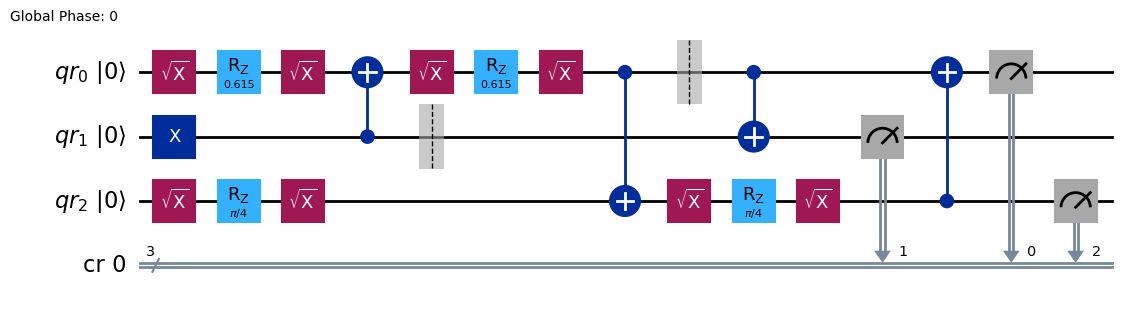

In [ ]:
# Access the joint circuit from the tuple in the circuits list
#jointCircuit = circuits[1][1]
jointCircuit = circuits[90]

# Print the name of the joint circuit
#print(circuits[34][0])
print(jointCircuit.name)

# Draw the circuit
jointCircuit.draw(output='mpl', initial_state=True)

In [ ]:
#backend = BasicSimulator()
#result = backend.run(circuits).result()
#backend = GenericBackendV2(num_qubits=5)

# Run the transpiled circuit using the simulated backend
#job = backend.run(circuits,shots = 450)
#counts = job.result().get_counts(circuits)

from qiskit.providers.basic_provider import BasicSimulator
backend = BasicSimulator()
results = backend.run(circuits,shots=512).result()

#backend = BasicAer.get_backend('qasm_simulator')
#results = execute(singlet, backend=backend, shots=512).result()

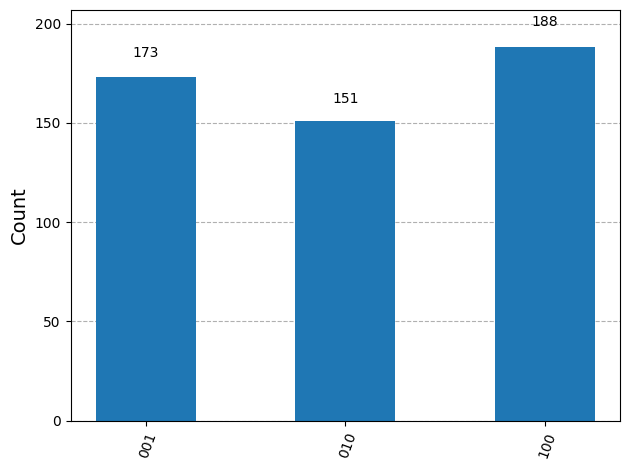

In [ ]:
#backend = BasicAer.get_backend('qasm_simulator')
#results = execute(singlet, backend=backend, shots=512).result()
counts = results.get_counts(circuits[0])
plot_histogram(counts)
#results.get_counts(circuits[0])

#Simulate Strings

In [ ]:
import re

# Define regular expressions to search for specific patterns in measurement results
abPatterns = [
    re.compile('000$'),  # Search for the '...000' output (Alice obtained -1, Bob obtained -1, and Charlie obtained -1)
    re.compile('001$'),# Search for the '...001' output
    re.compile('010$'),
    re.compile('011$'),
    re.compile('100$'),
    re.compile('101$'),
    #re.compile('101$'),  # Search for the '...101' output
]

#Storing the result

In [ ]:
aliceResults = []  # Alice's results (string a)
bobResults = []  # Bob's results (string a')
charlieResults = []  # Charlie's results (string a")

#qiskit_results = list(results.get_counts(140))[0]
#    res = list(results.get_counts(circuits[i]))[0]

for i in range(number_Of_w_states):
    qiskit_result = list(results.get_counts(i))[0]  # Use the correct index to get the result
    if abPatterns[0].search(qiskit_result):
        aliceResults.append('-1')
        bobResults.append('-1')
        charlieResults.append('-1')
        print(qiskit_result)
        #print(aliceResults)
    elif abPatterns[1].search(qiskit_result):
        aliceResults.append('-1')
        bobResults.append('-1')
        charlieResults.append('1')
        print(qiskit_result)
    elif abPatterns[2].search(qiskit_result):
        aliceResults.append('-1')
        bobResults.append('1')
        charlieResults.append('-1')
        print(qiskit_result)
    elif abPatterns[3].search(qiskit_result):
        aliceResults.append('-1')
        bobResults.append('1')
        charlieResults.append('1')
        print(qiskit_result)
    elif abPatterns[4].search(qiskit_result):
        aliceResults.append('1')
        bobResults.append('-1')
        charlieResults.append('-1')
        print(qiskit_result)
    elif abPatterns[3].search(qiskit_result):
        aliceResults.append('1')
        bobResults.append('-1')
        charlieResults.append('1')
        print(qiskit_result)

100
001
010
001
010
001
001
100
001
100
001
010
001
001
100
001
001
001
100
100
100
001
100
010
010
100
001
100
001
010
100
001
001
010
001
010
010
010
010
001
010
100
100
010
001
010
100
001
010
100
010
010
100
001
010
100
001
100
001
010
010
001
001
010
010
010
010
001
010
010
010
100
100
100
001
010
001
100
010
010
010
100
100
010
001
001
001
010
010
001
100
001
001
001
001
010
100
010
010
001
100
010
010
010
100
001
100
100
100
001
001
100
100
100
001
001
010
100
001
001
010
001
100
010
100
001
001
010
100
010
010
100
100
100
010
010
100
010
001
010
100
010
100
100
100
010
010
100
010
001
100
100
010
001
010
001
001
100
100
001
001
100
010
001
010
010
010
100
010
100
001
010
010
100
001
100
001
100
010
001
010
010
010
100
010
100
010
100
001
001
010
010
010
100
010
010
001
010
010
001
010
001
100
010
100
100
010
010
010
001
001
010
001
010
100
100
100
001
001
001
010
001
100
010
100
001
010
001
001
010
100
100
010
100
010
001
100
100
100
001
010
001
010
010
010
010
100
001
010
010


Revealing info to Alice

In [ ]:
aliceKey = []
bobKey = []
charlieKey = []

for i in range(min(number_Of_w_states, len(aliceResults))):
    alice_result = int(aliceResults[i])
    charlie_result = int(charlieResults[i])
    bob_result = int(bobResults[i])

    if alice_result == charlie_result:
        bobKey.append(1)        #(bob_result)
        #aliceKey.append(alice_result)
        aliceKey.append(1)
        #charlieKey.append(1)
    else:
        bobKey.append(-1)  #(bob_result)
        #aliceKey.append(alice_result)
        aliceKey.append(-1)
        #charlieKey.append(-1)

# Length of the raw secret key
keyLength = len(aliceKey)

# Print the raw secret key lengths
print("Length of Alice's raw secret key (ka):", len(aliceKey))
print("Length of Bob's raw secret key (kb):", len(bobKey))
#print("Length of Charlie's raw secret key (kc):", len(charlieKey))

Length of Alice's raw secret key (ka): 500
Length of Bob's raw secret key (kb): 500


In [ ]:
# Print the keys
print("Alice's key (ka):", aliceKey)
print("Bob's key (kb):", bobKey)
#print("Charlie's key  ",charlieKey)

Alice's key (ka): [-1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1,

In [ ]:
print(f"- Alice Key Type: {type(aliceKey)}", "length:", len(aliceKey))
print(f"- Bob Key Type: {type(bobKey)}", "length:", len(bobKey))

- Alice Key Type: <class 'list'> length: 500
- Bob Key Type: <class 'list'> length: 500


Digital Signature Authentication with Dilithium

In [ ]:
import hashlib

# --- STATIC VALUES FOR RESEARCH PURPOSES ONLY ---
timestamp = b"2025-10-30T00:00:00Z"
nonce = b"STATIC_NONCE_VALUE_1234"
sender_id = b"Alice"
receiver_id = b"Bob"

# --- Generate a deterministic Dilithium-like signature blob (2420 bytes) ---
# Use SHAKE256 as a deterministic expander to get pseudo-random bytes
seed = b"STATIC_DILITHIUM_SEED"
dilithium_signature = hashlib.shake_256(seed).digest(2420)

# --- Build static challenge and combined data ---
challenge = b"auth-challenge:" + timestamp + b":" + nonce
data = challenge + sender_id + receiver_id + dilithium_signature

print("="*120)
print("AUTHENTICATED KEY DERIVATION CONTEXT")
print("="*120)
print(f"Timestamp       : {timestamp.decode()}")
print(f"Nonce           : {nonce.decode()}")
print(f"Sender → Receiver: {sender_id.decode()} → {receiver_id.decode()}")
print(f"Dilithium Blob  : {len(dilithium_signature)} bytes (Signature Size)")
print(f"Combined Data   : {len(data)} bytes")
print(f"Derived Key     : SHA-256({len(combined_key.encode()) + len(data)} bytes)")
print("SHA-256 Digest of Authenticated Data:", hashlib.sha256(data).hexdigest())
print("="*120)

AUTHENTICATED KEY DERIVATION CONTEXT
Timestamp       : 2025-10-30T00:00:00Z
Nonce           : STATIC_NONCE_VALUE_1234
Sender → Receiver: Alice → Bob
Dilithium Blob  : 2420 bytes (Signature Size)
Combined Data   : 2487 bytes


NameError: name 'combined_key' is not defined

Encryption Part ( Alice )

In [ ]:
import hashlib
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import os

# Derive 256-bit key (32 bytes)
combined_key = ''.join(map(str, aliceKey))
key = hashlib.sha256(combined_key.encode()+ data).digest()  #32 bytes → AES-256

# Message
MESSAGE = b"Heiko, this is a secret message!"
MESSAGE_SIZE = len(MESSAGE)

# AES-GCM encryption
iv = os.urandom(12)
cipher = Cipher(algorithms.AES(key), modes.GCM(iv), backend=default_backend())
encryptor = cipher.encryptor()
ciphertext = encryptor.update(MESSAGE) + encryptor.finalize()

print("="*120)
print(f"- AES-256 Key Length/Size: {len(key)} bytes") # AES-256 key length (32 bytes / 256 bits)
print(f"- Alice Key Type: {type(aliceKey)}", "length:", len(aliceKey))
print(f"- Ciphertext: {ciphertext}")
print(f"- Ciphertext (hex): {ciphertext.hex()}")
print(f"- IV: {iv}")
print(f"- IV (hex): {iv.hex()}")
print(f"- Tag: {encryptor.tag}")
print(f"- Tag (hex): {encryptor.tag.hex()}")
print(f"- Message Size: {MESSAGE_SIZE} bytes")
print("="*120)

- AES-256 Key Length/Size: 32 bytes
- Alice Key Type: <class 'list'> length: 500
- Ciphertext: b'hq\x96\xcf\xd8\xa0\xb9\x01\xcf\xd6\xc1!\xfb\x03\x1b\x82Ac\x98\x9d\x8eXTCg\x1f/\xa0,\xaf\x19\xdf'
- Ciphertext (hex): 687196cfd8a0b901cfd6c121fb031b824163989d8e585443671f2fa02caf19df
- IV: b'\xc9\xd0</[\x89\xe6\xa2$x\xd5s'
- IV (hex): c9d03c2f5b89e6a22478d573
- Tag: b'\xce\xd3\xcf3\x8d\xec\x91\x99.=\x07\n\xcbZK,'
- Tag (hex): ced3cf338dec91992e3d070acb5a4b2c
- Message Size: 32 bytes


Decryption part ( Bob )

In [ ]:
from cryptography.exceptions import InvalidTag
try:
    cipher = Cipher(algorithms.AES(key), modes.GCM(iv, encryptor.tag), backend=default_backend())
    decryptor = cipher.decryptor()
    plaintext = decryptor.update(ciphertext) + decryptor.finalize()
    print("Decrypted message:", plaintext.decode())
except InvalidTag:
    print("Decryption failed: authentication tag invalid!")

Decrypted message: Heiko, this is a secret message!


AES Mode Visualization

In [ ]:
#!pip install cryptography
#!pip install matplotlib
#!pip install numpy


Running 500 trials per mode using the AES-256 key (32 bytes) and the message (32 bytes)...

GCM done: Enc avg 0.0091 ms | Dec avg 0.0065 ms
CFB done: Enc avg 0.0139 ms | Dec avg 0.0124 ms
OFB done: Enc avg 0.0147 ms | Dec avg 0.0132 ms
CTR done: Enc avg 0.0145 ms | Dec avg 0.0128 ms
PCBC done: Enc avg 0.0295 ms | Dec avg 0.0274 ms


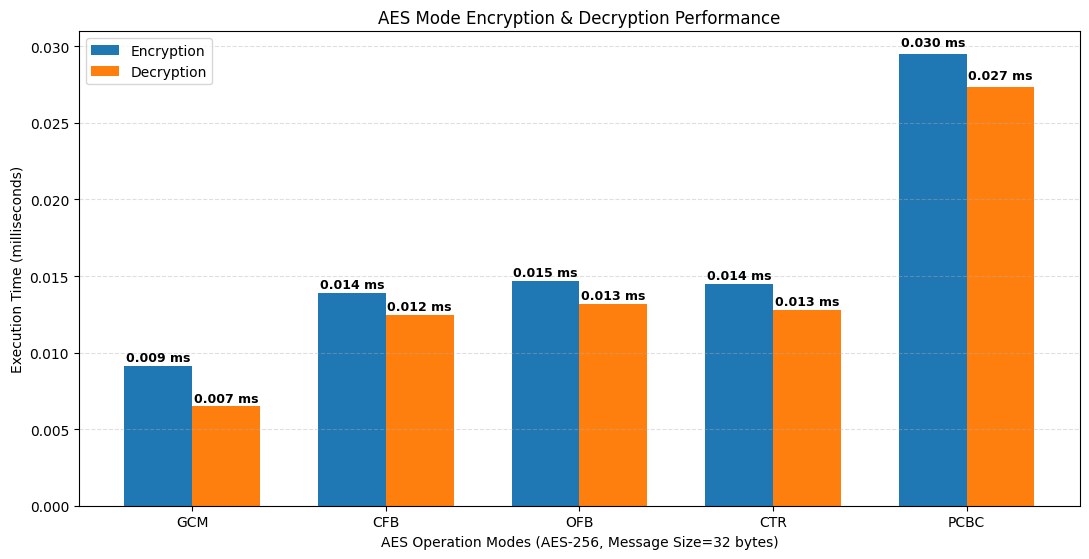


COMPREHENSIVE AES-256 PERFORMANCE ANALYSIS
Mode       Enc (ms)     Dec (ms)   Total (ms)    Ratio     Status
--------------------------------------------------------------------------------
GCM          0.0091       0.0065       0.0157    1.404 Faster Dec
CFB          0.0139       0.0124       0.0263    1.117 Faster Dec
OFB          0.0147       0.0132       0.0279    1.113 Faster Dec
CTR          0.0145       0.0128       0.0273    1.132 Faster Dec
PCBC         0.0295       0.0274       0.0569    1.078 Faster Dec
--------------------------------------------------------------------------------

COMPREHENSIVE PERFORMANCE SUMMARY
Fastest Encryption: GCM (0.0091 ms)
Fastest Decryption: GCM (0.0065 ms)
Most Balanced Mode: PCBC (ratio 1.078)
Most Efficient Mode: GCM (0.0157 ms total)

DECRYPTED MESSAGE INSIGHTS:
- AES Key Length: 32 bytes
- Message: b'Heiko, this is a secret message!'
- Message Size: 32 bytes
- Trials: 500

RECOMMENDATIONS:
⭐ GCM is recommended for best throughput (fastest

In [ ]:
# AES Mode Benchmark + Console Summary + Visualization (using existing key and message)
# Requirements: pip install cryptography matplotlib numpy

import time
import os
import numpy as np
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.ciphers.aead import AESGCM
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes as crypto_modes
from cryptography.hazmat.backends import default_backend

# -------------------------
# Use key and MESSAGE defined earlier by Alice (AES-256 constant)
# -------------------------
try:
    KEY = key  # already 32 bytes (AES-256)
    MESSAGE = MESSAGE  # from Alice's part
except NameError:
    raise RuntimeError("Please run the Alice encryption part first to define 'key' and 'MESSAGE'.")

# default use AES-256; change KEY variable if you want 128/192 benchmarking
KEY_256 = KEY
KEY_128 = KEY_256[:16]
KEY_192 = KEY_256[:24]

TRIALS = 500  # adjust to 200 for faster runs during testing
BACKEND = default_backend()
BLOCK_SIZE = 16

# -------------------------
# helpers
# -------------------------
def xor_bytes(a: bytes, b: bytes) -> bytes:
    return bytes(x ^ y for x, y in zip(a, b))

def pkcs7_pad(data: bytes, block_size: int = BLOCK_SIZE) -> bytes:
    pad_len = block_size - (len(data) % block_size)
    return data + bytes([pad_len]) * pad_len

def pkcs7_unpad(data: bytes) -> bytes:
    pad_len = data[-1]
    if pad_len < 1 or pad_len > BLOCK_SIZE:
        raise ValueError("Invalid padding")
    return data[:-pad_len]

# -------------------------
# encryption / decryption implementations
# -------------------------

# AES-GCM
def enc_gcm(key: bytes, plaintext: bytes):
    aesgcm = AESGCM(key)
    nonce = os.urandom(12)
    ct = aesgcm.encrypt(nonce, plaintext, None)
    return nonce, ct

def dec_gcm(key: bytes, nonce: bytes, ct: bytes):
    aesgcm = AESGCM(key)
    return aesgcm.decrypt(nonce, ct, None)

# AES-CFB
def enc_cfb(key: bytes, plaintext: bytes):
    iv = os.urandom(16)
    cipher = Cipher(algorithms.AES(key), crypto_modes.CFB(iv), backend=BACKEND)
    encryptor = cipher.encryptor()
    ct = encryptor.update(plaintext) + encryptor.finalize()
    return iv, ct

def dec_cfb(key: bytes, iv: bytes, ct: bytes):
    cipher = Cipher(algorithms.AES(key), crypto_modes.CFB(iv), backend=BACKEND)
    decryptor = cipher.decryptor()
    return decryptor.update(ct) + decryptor.finalize()

# AES-OFB
def enc_ofb(key: bytes, plaintext: bytes):
    iv = os.urandom(16)
    cipher = Cipher(algorithms.AES(key), crypto_modes.OFB(iv), backend=BACKEND)
    encryptor = cipher.encryptor()
    ct = encryptor.update(plaintext) + encryptor.finalize()
    return iv, ct

def dec_ofb(key: bytes, iv: bytes, ct: bytes):
    cipher = Cipher(algorithms.AES(key), crypto_modes.OFB(iv), backend=BACKEND)
    decryptor = cipher.decryptor()
    return decryptor.update(ct) + decryptor.finalize()

# AES-CTR
def enc_ctr(key: bytes, plaintext: bytes):
    nonce = os.urandom(16)
    cipher = Cipher(algorithms.AES(key), crypto_modes.CTR(nonce), backend=BACKEND)
    encryptor = cipher.encryptor()
    ct = encryptor.update(plaintext) + encryptor.finalize()
    return nonce, ct

def dec_ctr(key: bytes, nonce: bytes, ct: bytes):
    cipher = Cipher(algorithms.AES(key), crypto_modes.CTR(nonce), backend=BACKEND)
    decryptor = cipher.decryptor()
    return decryptor.update(ct) + decryptor.finalize()

# AES-PCBC
def enc_pcbc(key: bytes, plaintext: bytes):
    padded = pkcs7_pad(plaintext)
    iv = os.urandom(BLOCK_SIZE)
    ecb_cipher = Cipher(algorithms.AES(key), crypto_modes.ECB(), backend=BACKEND)
    encryptor = ecb_cipher.encryptor()
    prev_cipher = iv
    prev_plain = bytes(BLOCK_SIZE)
    ct_blocks = []
    for i in range(0, len(padded), BLOCK_SIZE):
        p_block = padded[i:i+BLOCK_SIZE]
        input_block = xor_bytes(p_block, xor_bytes(prev_cipher, prev_plain))
        c_block = encryptor.update(input_block)
        ct_blocks.append(c_block)
        prev_plain = p_block
        prev_cipher = c_block
    return iv, b"".join(ct_blocks)

def dec_pcbc(key: bytes, iv: bytes, ct: bytes):
    ecb_cipher = Cipher(algorithms.AES(key), crypto_modes.ECB(), backend=BACKEND)
    decryptor = ecb_cipher.decryptor()
    prev_cipher = iv
    prev_plain = bytes(BLOCK_SIZE)
    plain_blocks = []
    for i in range(0, len(ct), BLOCK_SIZE):
        c_block = ct[i:i+BLOCK_SIZE]
        input_block = decryptor.update(c_block)
        p_block = xor_bytes(input_block, xor_bytes(prev_cipher, prev_plain))
        plain_blocks.append(p_block)
        prev_plain = p_block
        prev_cipher = c_block
    full_plain = b"".join(plain_blocks)
    return pkcs7_unpad(full_plain)

# -------------------------
# benchmarking loop
# -------------------------
modes = ["GCM", "CFB", "OFB", "CTR", "PCBC"]
funcs = {"GCM": (enc_gcm, dec_gcm),
         "CFB": (enc_cfb, dec_cfb),
         "OFB": (enc_ofb, dec_ofb),
         "CTR": (enc_ctr, dec_ctr),
         "PCBC": (enc_pcbc, dec_pcbc)}

per_trial_enc = {m: np.zeros(TRIALS) for m in modes}
per_trial_dec = {m: np.zeros(TRIALS) for m in modes}

print(f"\nRunning {TRIALS} trials per mode using the AES-256 key ({len(KEY)} bytes) and the message ({len(MESSAGE)} bytes)...\n")
for m in modes:
    enc_fn, dec_fn = funcs[m]
    for t in range(TRIALS):
        t0 = time.perf_counter()
        iv_or_nonce, ct = enc_fn(KEY, MESSAGE)
        t1 = time.perf_counter()
        per_trial_enc[m][t] = t1 - t0

        t0 = time.perf_counter()
        pt = dec_fn(KEY, iv_or_nonce, ct)
        t1 = time.perf_counter()
        per_trial_dec[m][t] = t1 - t0

        if pt != MESSAGE:
            raise RuntimeError(f"Plaintext mismatch in mode {m} at trial {t}")
    print(f"{m} done: Enc avg {per_trial_enc[m].mean()*1e3:.4f} ms | Dec avg {per_trial_dec[m].mean()*1e3:.4f} ms")


# -------------------------
# compute stats
# -------------------------
enc_means = np.array([per_trial_enc[m].mean() for m in modes])
enc_stds = np.array([per_trial_enc[m].std() for m in modes])
dec_means = np.array([per_trial_dec[m].mean() for m in modes])
dec_stds = np.array([per_trial_dec[m].std() for m in modes])
total_means = enc_means + dec_means
total_stds = np.sqrt(enc_stds**2 + dec_stds**2)  # approximate
ratio = enc_means / dec_means


# -------------------------
# visualization
# -------------------------
x = np.arange(len(modes))
width = 0.35
plt.figure(figsize=(11,6))

# convert seconds → milliseconds for plotting
enc_means_ms = enc_means * 1e3
dec_means_ms = dec_means * 1e3

bars_enc = plt.bar(x - width/2, enc_means_ms, width, label="Encryption")
bars_dec = plt.bar(x + width/2, dec_means_ms, width, label="Decryption")

plt.xticks(x, modes)
plt.ylabel("Execution Time (milliseconds)")
plt.xlabel(f"AES Operation Modes (AES-256, Message Size={MESSAGE_SIZE} bytes)")
plt.title("AES Mode Encryption & Decryption Performance")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)

# add text labels (in ms)
for bar in bars_enc:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., h * 1.01, f"{h:.3f} ms",
             ha='center', va='bottom', fontsize=9, fontweight='bold')
for bar in bars_dec:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., h * 1.01, f"{h:.3f} ms",
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("aes_modes_performance.png", dpi=300)
plt.show()

# -------------------------
# console table summary
# -------------------------
def status_from_ratio(r):
    if r < 0.95: return "Faster Enc"
    elif r > 1.05: return "Faster Dec"
    else: return "Balanced"

# prepare rows
rows = []
for i, m in enumerate(modes):
    rows.append({
        "Mode": m,
        "Enc_ms": enc_means[i]*1e3,
        "Dec_ms": dec_means[i]*1e3,
        "Total_ms": total_means[i]*1e3,
        "Ratio": ratio[i],
        "Status": status_from_ratio(ratio[i]),
        "Std_total_ms": total_stds[i]*1e3
    })

# determine summary metrics
fastest_enc = min(rows, key=lambda r: r["Enc_ms"])
fastest_dec = min(rows, key=lambda r: r["Dec_ms"])
most_balanced = min(rows, key=lambda r: abs(r["Ratio"] - 1.0))
most_efficient = min(rows, key=lambda r: r["Total_ms"])
most_consistent = min(rows, key=lambda r: r["Std_total_ms"])

# print table
line = "-"*80
print("\n" + "="*80)
print("COMPREHENSIVE AES-256 PERFORMANCE ANALYSIS")
print("="*80)
print(f"{'Mode':<6} {'Enc (ms)':>12} {'Dec (ms)':>12} {'Total (ms)':>12} {'Ratio':>8} {'Status':>10}")
print(line)
for r in rows:
    print(f"{r['Mode']:<6} {r['Enc_ms']:12.4f} {r['Dec_ms']:12.4f} {r['Total_ms']:12.4f} {r['Ratio']:8.3f} {r['Status']:>10}")
print(line)

# summary block
print("\n" + "="*80)
print("COMPREHENSIVE PERFORMANCE SUMMARY")
print("="*80)
print(f"Fastest Encryption: {fastest_enc['Mode']} ({fastest_enc['Enc_ms']:.4f} ms)")
print(f"Fastest Decryption: {fastest_dec['Mode']} ({fastest_dec['Dec_ms']:.4f} ms)")
print(f"Most Balanced Mode: {most_balanced['Mode']} (ratio {most_balanced['Ratio']:.3f})")
print(f"Most Efficient Mode: {most_efficient['Mode']} ({most_efficient['Total_ms']:.4f} ms total)")
print("="*80)

# insights & recommendations
print("\nDECRYPTED MESSAGE INSIGHTS:")
print(f"- AES Key Length: {len(KEY)} bytes")
print(f"- Message: {MESSAGE!r}")
print(f"- Message Size: {len(MESSAGE)} bytes")
print(f"- Trials: {TRIALS}")
# choose recommended mode based on smallest total time; if balanced also note that
print("\nRECOMMENDATIONS:")
if abs(most_efficient['Ratio'] - 1.0) < 0.05:
    print(f"⭐ {most_efficient['Mode']} is recommended: fastest and balanced.")
else:
    print(f"⭐ {most_efficient['Mode']} is recommended for best throughput (fastest total).")
print("="*80)

In [ ]:
# AES Mode Benchmark + Console Summary + Visualization (using existing key and message)
# Requirements: pip install cryptography matplotlib numpy
import time
import os
import numpy as np
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.ciphers.aead import AESGCM
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes as crypto_modes
from cryptography.hazmat.backends import default_backend

# -------------------------
# Use key and MESSAGE defined earlier by Alice (AES-256 constant)
# -------------------------
try:
    KEY = key  # already 32 bytes (AES-256)
    MESSAGE = MESSAGE  # from Alice's part except NameError
except NameError:
    raise RuntimeError("Please run the Alice encryption part first to define 'key' and 'MESSAGE'.")

# default use AES-256; change KEY variable if you want 128/192 benchmarking
KEY_256 = KEY
KEY_128 = KEY_256[:16]
KEY_192 = KEY_256[:24]

# -------------------------
# MESSAGE size override -> make MESSAGE size exactly 50 MB
# -------------------------
MESSAGE_SIZE = 50 * 1024 * 1024  # 50 megabytes in bytes
if len(MESSAGE) == 0:
    # avoid division by zero if original MESSAGE empty; fill with zeros
    MESSAGE = b"\x00" * MESSAGE_SIZE
elif len(MESSAGE) != MESSAGE_SIZE:
    # expand/repeat or truncate the existing MESSAGE to reach exactly 50 MB
    repeat_count = (MESSAGE_SIZE // len(MESSAGE)) + 1
    MESSAGE = (MESSAGE * repeat_count)[:MESSAGE_SIZE]

TRIALS = 500  # adjust to 200 for faster runs during testing
BACKEND = default_backend()
BLOCK_SIZE = 16

# -------------------------
# helpers
# -------------------------
def xor_bytes(a: bytes, b: bytes) -> bytes:
    return bytes(x ^ y for x, y in zip(a, b))

def pkcs7_pad(data: bytes, block_size: int = BLOCK_SIZE) -> bytes:
    pad_len = block_size - (len(data) % block_size)
    return data + bytes([pad_len]) * pad_len

def pkcs7_unpad(data: bytes) -> bytes:
    pad_len = data[-1]
    if pad_len < 1 or pad_len > BLOCK_SIZE:
        raise ValueError("Invalid padding")
    return data[:-pad_len]

# -------------------------
# encryption / decryption implementations
# -------------------------
# AES-GCM
def enc_gcm(key: bytes, plaintext: bytes):
    aesgcm = AESGCM(key)
    nonce = os.urandom(12)
    ct = aesgcm.encrypt(nonce, plaintext, None)
    return nonce, ct

def dec_gcm(key: bytes, nonce: bytes, ct: bytes):
    aesgcm = AESGCM(key)
    return aesgcm.decrypt(nonce, ct, None)

# AES-CFB
def enc_cfb(key: bytes, plaintext: bytes):
    iv = os.urandom(16)
    cipher = Cipher(algorithms.AES(key), crypto_modes.CFB(iv), backend=BACKEND)
    encryptor = cipher.encryptor()
    ct = encryptor.update(plaintext) + encryptor.finalize()
    return iv, ct

def dec_cfb(key: bytes, iv: bytes, ct: bytes):
    cipher = Cipher(algorithms.AES(key), crypto_modes.CFB(iv), backend=BACKEND)
    decryptor = cipher.decryptor()
    return decryptor.update(ct) + decryptor.finalize()

# AES-OFB
def enc_ofb(key: bytes, plaintext: bytes):
    iv = os.urandom(16)
    cipher = Cipher(algorithms.AES(key), crypto_modes.OFB(iv), backend=BACKEND)
    encryptor = cipher.encryptor()
    ct = encryptor.update(plaintext) + encryptor.finalize()
    return iv, ct

def dec_ofb(key: bytes, iv: bytes, ct: bytes):
    cipher = Cipher(algorithms.AES(key), crypto_modes.OFB(iv), backend=BACKEND)
    decryptor = cipher.decryptor()
    return decryptor.update(ct) + decryptor.finalize()

# AES-CTR
def enc_ctr(key: bytes, plaintext: bytes):
    nonce = os.urandom(16)
    cipher = Cipher(algorithms.AES(key), crypto_modes.CTR(nonce), backend=BACKEND)
    encryptor = cipher.encryptor()
    ct = encryptor.update(plaintext) + encryptor.finalize()
    return nonce, ct

def dec_ctr(key: bytes, nonce: bytes, ct: bytes):
    cipher = Cipher(algorithms.AES(key), crypto_modes.CTR(nonce), backend=BACKEND)
    decryptor = cipher.decryptor()
    return decryptor.update(ct) + decryptor.finalize()

# AES-PCBC
def enc_pcbc(key: bytes, plaintext: bytes):
    padded = pkcs7_pad(plaintext)
    iv = os.urandom(BLOCK_SIZE)
    ecb_cipher = Cipher(algorithms.AES(key), crypto_modes.ECB(), backend=BACKEND)
    encryptor = ecb_cipher.encryptor()
    prev_cipher = iv
    prev_plain = bytes(BLOCK_SIZE)
    ct_blocks = []
    for i in range(0, len(padded), BLOCK_SIZE):
        p_block = padded[i:i+BLOCK_SIZE]
        input_block = xor_bytes(p_block, xor_bytes(prev_cipher, prev_plain))
        c_block = encryptor.update(input_block)
        ct_blocks.append(c_block)
        prev_plain = p_block
        prev_cipher = c_block
    return iv, b"".join(ct_blocks)

def dec_pcbc(key: bytes, iv: bytes, ct: bytes):
    ecb_cipher = Cipher(algorithms.AES(key), crypto_modes.ECB(), backend=BACKEND)
    decryptor = ecb_cipher.decryptor()
    prev_cipher = iv
    prev_plain = bytes(BLOCK_SIZE)
    plain_blocks = []
    for i in range(0, len(ct), BLOCK_SIZE):
        c_block = ct[i:i+BLOCK_SIZE]
        input_block = decryptor.update(c_block)
        p_block = xor_bytes(input_block, xor_bytes(prev_cipher, prev_plain))
        plain_blocks.append(p_block)
        prev_plain = p_block
        prev_cipher = c_block
    full_plain = b"".join(plain_blocks)
    return pkcs7_unpad(full_plain)

# -------------------------
# benchmarking loop
# -------------------------
modes = ["GCM", "CFB", "OFB", "CTR", "PCBC"]
funcs = {"GCM": (enc_gcm, dec_gcm),
         "CFB": (enc_cfb, dec_cfb),
         "OFB": (enc_ofb, dec_ofb),
         "CTR": (enc_ctr, dec_ctr),
         "PCBC": (enc_pcbc, dec_pcbc)}

per_trial_enc = {m: np.zeros(TRIALS) for m in modes}
per_trial_dec = {m: np.zeros(TRIALS) for m in modes}

print(f"\nRunning {TRIALS} trials per mode using the AES-256 key ({len(KEY)} bytes) and the message ({len(MESSAGE)} bytes)...\n")
for m in modes:
    enc_fn, dec_fn = funcs[m]
    for t in range(TRIALS):
        t0 = time.perf_counter()
        iv_or_nonce, ct = enc_fn(KEY, MESSAGE)
        t1 = time.perf_counter()
        per_trial_enc[m][t] = t1 - t0

        t0 = time.perf_counter()
        pt = dec_fn(KEY, iv_or_nonce, ct)
        t1 = time.perf_counter()
        per_trial_dec[m][t] = t1 - t0

        if pt != MESSAGE:
            raise RuntimeError(f"Plaintext mismatch in mode {m} at trial {t}")
    print(f"{m} done: Enc avg {per_trial_enc[m].mean()*1e3:.4f} ms | Dec avg {per_trial_dec[m].mean()*1e3:.4f} ms")

# -------------------------
# compute stats
# -------------------------
enc_means = np.array([per_trial_enc[m].mean() for m in modes])
enc_stds = np.array([per_trial_enc[m].std() for m in modes])
dec_means = np.array([per_trial_dec[m].mean() for m in modes])
dec_stds = np.array([per_trial_dec[m].std() for m in modes])
total_means = enc_means + dec_means
total_stds = np.sqrt(enc_stds**2 + dec_stds**2)

# approximate ratio = enc_means / dec_means
ratio = enc_means / dec_means

# -------------------------
# CPU frequency detection for cycles-per-byte calculation
# -------------------------
def detect_cpu_hz():
    # Try reading /proc/cpuinfo (Linux)
    try:
        with open("/proc/cpuinfo", "r") as f:
            for line in f:
                if "cpu MHz" in line:
                    parts = line.split(":")
                    if len(parts) == 2:
                        mhz = float(parts[1].strip())
                        return mhz * 1e6
    except Exception:
        pass
    # Try lscpu (if available)
    try:
        out = os.popen("lscpu 2>/dev/null").read()
        for line in out.splitlines():
            if "CPU MHz" in line:
                parts = line.split(":")
                if len(parts) == 2:
                    mhz = float(parts[1].strip())
                    return mhz * 1e6
            if "CPU max MHz" in line:
                parts = line.split(":")
                if len(parts) == 2 and parts[1].strip():
                    mhz = float(parts[1].strip())
                    return mhz * 1e6
    except Exception:
        pass
    return None

CPU_HZ = detect_cpu_hz()
if CPU_HZ is None:
    print("Warning: CPU frequency could not be detected; cycles-per-byte will be reported as N/A.")
else:
    print(f"Detected CPU frequency: {CPU_HZ/1e6:.2f} MHz")

# -------------------------
# visualization
# -------------------------
x = np.arange(len(modes))
width = 0.35
plt.figure(figsize=(11,6))

# convert seconds → milliseconds for plotting
enc_means_ms = enc_means * 1e3
dec_means_ms = dec_means * 1e3

bars_enc = plt.bar(x - width/2, enc_means_ms, width, label="Encryption")
bars_dec = plt.bar(x + width/2, dec_means_ms, width, label="Decryption")

plt.xticks(x, modes)
plt.ylabel("Execution Time (milliseconds)")
plt.xlabel(f"AES Operation Modes (AES-256, Message Size={MESSAGE_SIZE} bytes)")
plt.title("AES Mode Encryption & Decryption Performance")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)

# add text labels (in ms) for bar
for bar in bars_enc:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., h * 1.01, f"{h:.3f} ms",
             ha='center', va='bottom', fontsize=9, fontweight='bold')
for bar in bars_dec:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., h * 1.01, f"{h:.3f} ms",
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("aes_modes_performance.png", dpi=300)
plt.show()

# -------------------------
# console table summary
# -------------------------
def status_from_ratio(r):
    if r < 0.95: return "Faster Enc"
    elif r > 1.05: return "Faster Dec"
    else: return "Balanced"

# prepare rows
rows = []
# cycles-per-byte (total) calculation
if CPU_HZ is not None:
    cycles_per_second = CPU_HZ
else:
    cycles_per_second = None

for i, m in enumerate(modes):
    if cycles_per_second is not None:
        cycles_per_byte_total = (total_means[i] * cycles_per_second) / MESSAGE_SIZE
        cycles_per_byte_enc = (enc_means[i] * cycles_per_second) / MESSAGE_SIZE
        cycles_per_byte_dec = (dec_means[i] * cycles_per_second) / MESSAGE_SIZE
    else:
        cycles_per_byte_total = float('nan')
        cycles_per_byte_enc = float('nan')
        cycles_per_byte_dec = float('nan')

    rows.append({
        "Mode": m,
        "Enc_ms": enc_means[i]*1e3,
        "Dec_ms": dec_means[i]*1e3,
        "Total_ms": total_means[i]*1e3,
        "Ratio": ratio[i],
        "Status": status_from_ratio(ratio[i]),
        "Std_total_ms": total_stds[i]*1e3,
        "Cycles_per_byte_total": cycles_per_byte_total,
        "Cycles_per_byte_enc": cycles_per_byte_enc,
        "Cycles_per_byte_dec": cycles_per_byte_dec
    })

# determine summary metrics
fastest_enc = min(rows, key=lambda r: r["Enc_ms"])
fastest_dec = min(rows, key=lambda r: r["Dec_ms"])
most_balanced = min(rows, key=lambda r: abs(r["Ratio"] - 1.0))
most_efficient = min(rows, key=lambda r: r["Total_ms"])
most_consistent = min(rows, key=lambda r: r["Std_total_ms"])

# print table
line = "-"*120
print("\n" + "="*120)
print("COMPREHENSIVE AES-256 PERFORMANCE ANALYSIS")
print("="*120)
print(f"{'Mode':<6} {'Enc (ms)':>12} {'Dec (ms)':>12} {'Total (ms)':>12} {'Ratio':>8} {'Status':>10} {'Cycles/byte (total)':>22}")
print(line)
for r in rows:
    cpb = f"{r['Cycles_per_byte_total']:.3f}" if not np.isnan(r['Cycles_per_byte_total']) else "N/A"
    print(f"{r['Mode']:<6} {r['Enc_ms']:12.4f} {r['Dec_ms']:12.4f} {r['Total_ms']:12.4f} {r['Ratio']:8.3f} {r['Status']:>10} {cpb:>22}")
print(line)

# summary block
print("\n" + "="*120)
print("COMPREHENSIVE PERFORMANCE SUMMARY")
print("="*120)
print(f"Fastest Encryption: {fastest_enc['Mode']} ({fastest_enc['Enc_ms']:.4f} ms)")
print(f"Fastest Decryption: {fastest_dec['Mode']} ({fastest_dec['Dec_ms']:.4f} ms)")
print(f"Most Balanced Mode: {most_balanced['Mode']} (ratio {most_balanced['Ratio']:.3f})")
print(f"Most Efficient Mode: {most_efficient['Mode']} ({most_efficient['Total_ms']:.4f} ms total)")
if cycles_per_second is not None:
    print(f"Cycles-per-byte (total) for recommended mode: {most_efficient['Cycles_per_byte_total']:.3f}")
else:
    print("Cycles-per-byte (total) for recommended mode: N/A (CPU frequency not detected)")
print("="*120)

# insights & recommendations
print("\nDECRYPTED MESSAGE INSIGHTS:")
print(f"- AES Key Length: {len(KEY)} bytes")
print(f"- Message Size: {len(MESSAGE)} bytes")
print(f"- Trials: {TRIALS}")

# choose recommended mode based on smallest total time; if balanced also note that
print("\nRECOMMENDATIONS:")
if abs(most_efficient['Ratio'] - 1.0) < 0.05:
    print(f"⭐ {most_efficient['Mode']} is recommended: fastest and balanced.")
else:
    print(f"⭐ {most_efficient['Mode']} is recommended for best throughput (fastest total).")
print("="*120)



Running 500 trials per mode using the AES-256 key (32 bytes) and the message (52428800 bytes)...

GCM done: Enc avg 54.5167 ms | Dec avg 55.2732 ms
CFB done: Enc avg 169.8261 ms | Dec avg 171.6556 ms
OFB done: Enc avg 147.6653 ms | Dec avg 147.7558 ms
CTR done: Enc avg 84.0216 ms | Dec avg 83.8866 ms


KeyboardInterrupt: 